<a href="https://colab.research.google.com/github/miriamnazihsalehlb30/knowledge_graph_robotics/blob/main/knowledge_graph_robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robotics Knowledge Graph**
---
This project is part of the AI Summer Sprint Challenge. It focuses on building and visualizing a Knowledge Graph expermint with networkx to represent key components in a robotics system.

The graph consists of nodes representing sensors, actuators, control units, and their functions, with directed edges defining relationships between them.


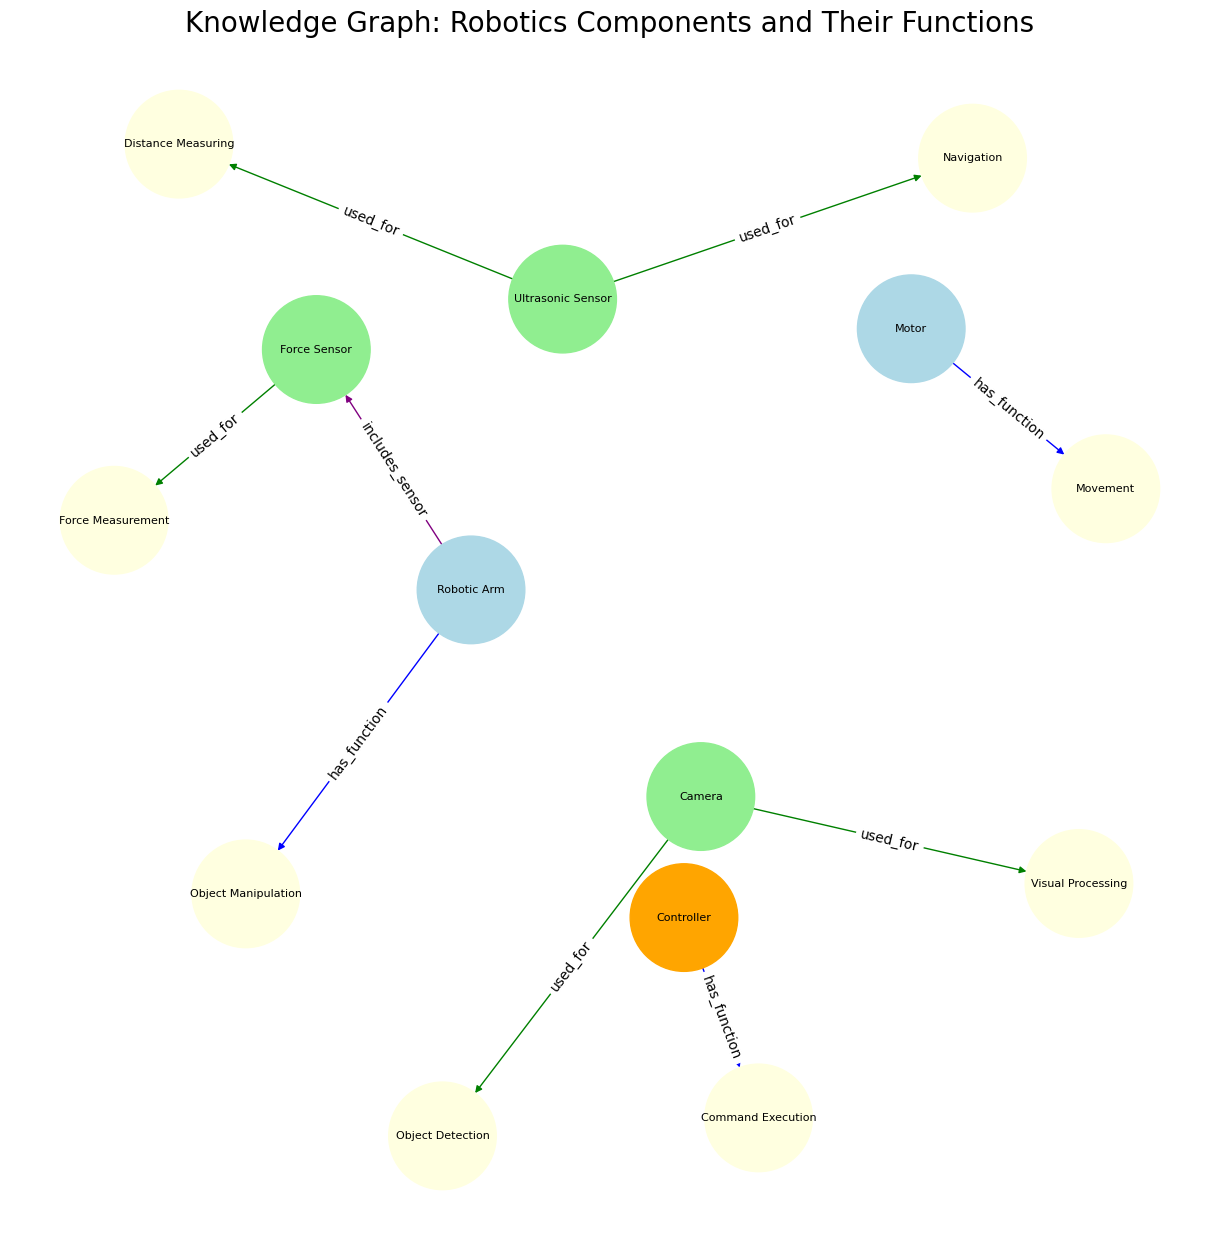

In [ ]:

# Project Title: Robotics Knowledge Graph
# Description: This notebook builds a knowledge graph for components in a robotic system using NetworkX.
#-------------------------------------------------------------------------------------------------------

#step1:importing libraries
import networkx as nx
import matplotlib.pyplot as plt

# networkx: Python library used for creating and working with graphs and networks
# matplotlib.pyplot: Python library is a plotting library for creating charts and visualizations.

#--------------------------------------------------------------------------------------------------------

# step 2: Define the knowldege triples (Subject, Relationship (verb), Object)
triples = [
    ("Motor", "has_function", "Movement"),
    ("Ultrasonic Sensor", "used_for", "Distance Measuring"),
    ("Ultrasonic Sensor", "used_for", "Navigation"),
    ("Camera", "used_for", "Visual Processing"),
    ("Camera", "used_for", "Object Detection"),
    ("Controller", "has_function", "Command Execution"),
    ("Robotic Arm", "has_function", "Object Manipulation"),
    ("Robotic Arm", "includes_sensor", "Force Sensor"),
    ("Force Sensor", "used_for", "Force Measurement")
]

#-------------------------------------------------------------------------------------------------------

# step 3: Building the Knowledge Graph

# Create a directed graph
G = nx.DiGraph()

# Add edges for the triples
for subj, rel, obj in triples:
    G.add_edge(subj, obj, label=rel)

# Assign node types
node_types = {
    "Motor": "Actuator",
    "Ultrasonic Sensor": "Sensor",
    "Camera": "Sensor",
    "Controller": "Control unit",
    "Robotic Arm": "Actuator",
    "Force Sensor": "Sensor",
    "Movement": "Function",
    "Distance Measuring": "Function",
    "Navigation": "Function",
    "Visual Processing": "Function",
    "Object Detection": "Function",
    "Command Execution": "Function",
    "Object Manipulation": "Function",
    "Force Measurement": "Function"
}

# Add node types as attributes
for node, node_type in node_types.items():
    if node in G:
        G.nodes[node]['node_type'] = node_type

#-------------------------------------------------------------------------------------------------------

#step 4: visualize our work on knowledge graph

# defining the the nodes colors based on the colors of the types
color_map = {
    "Actuator": "lightblue",
    "Sensor" : "lightgreen",
    "Control unit": "orange",
    "Function" : "lightyellow"
}
node_colors = [color_map.get(G.nodes[node]['node_type'],'gray')for node in G.nodes()]

# Define edge colors based on relation
edge_color_map = {
    "has_function": "blue",
    "used_for": "green",
    "includes_sensor": "purple"
}
edge_colors = [edge_color_map.get(G.edges[edge]['label'], 'black') for edge in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, k=0.6,seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color = node_colors, node_size=6000, font_size=8, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="black")
plt.title("Knowledge Graph: Robotics Components and Their Functions",fontsize = 20)
plt.show()

#---------------------------------------------------------------------------------------------------------------